## Setting up the algorithm

In [1]:
# Data Analysis
import numpy as np 
from numpy import linalg as LA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('darkgrid')
np.random.seed(42)

In [2]:
# Function to tri-diagonalize a matrix
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
  return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

# Lanczos algorithm
def lanczos(A, v1, m = 10 ):#m = No of iterations
  np.set_printoptions(precision=3, suppress=True)
  # First iteration steps
  x, y = [], []
  n = m
  v2, beta = 0.0, 0.0

  for i in range(n):
    # Iteration steps
    w_prime = np.dot(A, v1)
    conj = np.matrix.conjugate(w_prime)
    alpha = np.dot(conj, v1)
    w = w_prime - alpha * v1 - beta * v2
    beta = np.linalg.norm(w)
    x.append(np.linalg.norm(alpha))

    # Reset
    if i < (n-1):
        y.append(beta)
    v2 = v1
    v1 = w/beta
    
  return tridiag(y, x, y)


## Example - Diagonal
We test our algorithm on an example where A = diag(0,1,2,3,4,100), and visualize the results.

### Symmetric

In [3]:
A = np.diag([0., 1., 2., 3., 4., 100.])
n = A.shape[1]
v_0 = np.zeros(n)
v_0.fill(1.)
v = v_0 / np.linalg.norm(v_0)

# Obtaining the tri-diagonal matrix T
T = lanczos(A, v)
print(f'Tridiagonalization of A: \n{T}')

# Finding the eigenvalues w and eigenvectors v of the tri-diagonal matrix
w, v = LA.eig(T)
print(f'\nAssociated eigenvalues: \n{w}')
print(f'\nAssociated eigenvectors: \n{v}')

Tridiagonalization of A: 
[[ 18.333  36.545   0.      0.      0.      0.      0.      0.      0.
    0.   ]
 [ 36.545  83.524   3.459   0.      0.      0.      0.      0.      0.
    0.   ]
 [  0.      3.459   2.114   1.184   0.      0.      0.      0.      0.
    0.   ]
 [  0.      0.      1.184   2.008   1.014   0.      0.      0.      0.
    0.   ]
 [  0.      0.      0.      1.014   2.009   0.756   0.      0.      0.
    0.   ]
 [  0.      0.      0.      0.      0.756   2.012   0.      0.      0.
    0.   ]
 [  0.      0.      0.      0.      0.      0.    100.      0.      0.
    0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      1.838   1.795
    0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      1.795   2.117
    0.846]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.846
    2.066]]

Associated eigenvalues: 
[100.    100.      3.      4.      1.      2.      0.      3.988   0.008
   2.025]

Associated eigenvectors: 
[[ 0.408

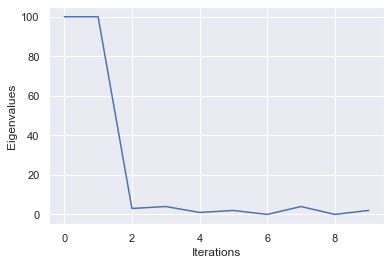

In [4]:
plt.plot(w)
plt.xlabel('Iterations')
plt.ylabel('Eigenvalues')
plt.show()

### Non-symmetric

In [5]:
del_A = np.random.rand(6,6)
print("A is:")
print(np.diag([0., 1., 2., 3., 4., 100.]))
print("del_A is:")
print(del_A)

A is:
[[  0.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.]
 [  0.   0.   2.   0.   0.   0.]
 [  0.   0.   0.   3.   0.   0.]
 [  0.   0.   0.   0.   4.   0.]
 [  0.   0.   0.   0.   0. 100.]]
del_A is:
[[0.375 0.951 0.732 0.599 0.156 0.156]
 [0.058 0.866 0.601 0.708 0.021 0.97 ]
 [0.832 0.212 0.182 0.183 0.304 0.525]
 [0.432 0.291 0.612 0.139 0.292 0.366]
 [0.456 0.785 0.2   0.514 0.592 0.046]
 [0.608 0.171 0.065 0.949 0.966 0.808]]



Associated eigenvalues for eta = 0: 
[  0.      0.008   1.      2.      2.025   3.      3.988   4.    100.
 100.   ]
True Eigenvalues:
[  0.   1.   2.   3.   4. 100.]


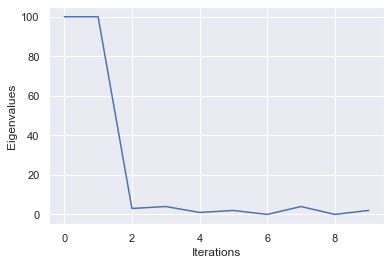


Associated eigenvalues for eta = 0.001: 
[  0.001   0.014   1.001   2.      3.      3.119   4.001 100.001 100.001
 100.001]
True Eigenvalues:
[  0.      1.001   2.      3.      4.001 100.001]


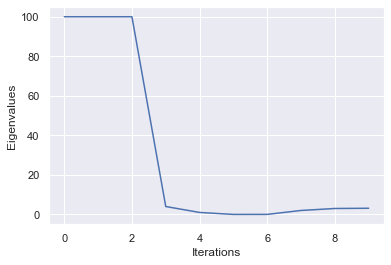


Associated eigenvalues for eta = 0.1: 
[  0.058   0.286   1.074   1.971   3.024   4.06  100.082 100.097 100.138
 100.217]
True Eigenvalues:
[  0.033   1.084   2.021   3.016   4.061 100.081]


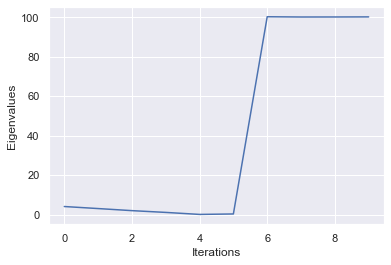


Associated eigenvalues for eta = 0.5: 
[  0.138   1.248   1.908   3.106   4.401   4.581 100.417 100.496 100.656
 101.053]
True Eigenvalues:
[  0.111   1.337   2.145   3.122   4.36  100.406]


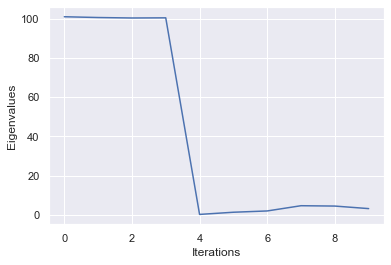


Associated eigenvalues for eta = 1: 
[ -0.215   0.704   2.034   3.364   5.087   6.032 100.827 101.013 101.102
 101.594]
True Eigenvalues:
[  0.156   1.495   2.229   3.368   4.898 100.816]


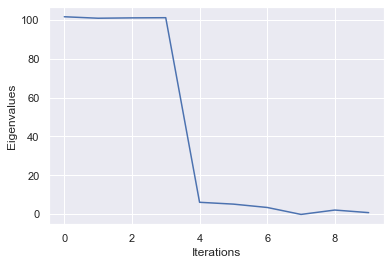

In [6]:


for eta in [0,0.001,0.1,0.5,1]:
    
    A = np.diag([0., 1., 2., 3., 4., 100.]) + eta*del_A
    n = A.shape[1]
    v_0 = np.zeros(n)
    v_0.fill(1.)
    v = v_0 / np.linalg.norm(v_0)

    # Obtaining the tri-diagonal matrix T
    T = lanczos(A, v)
    #print(f'Tridiagonalization of A: \n{T}')

    # Finding the eigenvalues w and eigenvectors v of the tri-diagonal matrix
    w, v = LA.eig(T)
    print(f'\nAssociated eigenvalues for eta = {eta}: \n{np.sort(w)}')
    #print(f'\nAssociated eigenvectors: \n{v}')
    w_true = LA.eigvals(A)
    print("True Eigenvalues:")
    print(np.sort(w_true))

    plt.plot(w)
    plt.xlabel('Iterations')
    plt.ylabel('Eigenvalues')
    plt.show()

## Example - Random Matrix
Now, we generate a random symmetric matrix, and compare the generated eigenvalues with actual ones.


### Symmetric

In [7]:
N = 10 #Size of the matrix
b = np.random.random_integers(-100,100,size=(N,N))
A= (b + b.T)/2


n = A.shape[1]
v_0 = np.zeros(n)
v_0.fill(1.)
v = v_0 / np.linalg.norm(v_0)

print("Lanczos Results:")
# Obtaining the tri-diagonal matrix T
T = lanczos(A, v)
print(f'Tridiagonalization of A: \n{T}')

# Finding the eigenvalues w and eigenvectors v of the tri-diagonal matrix
w, v = LA.eig(T)
print(f'\nAssociated eigenvalues: \n{w}')
print(f'\nAssociated eigenvectors: \n{v}')



Lanczos Results:
Tridiagonalization of A: 
[[ 60.     67.868   0.      0.      0.      0.      0.      0.      0.
    0.   ]
 [ 67.868  23.502 132.792   0.      0.      0.      0.      0.      0.
    0.   ]
 [  0.    132.792  92.984 134.855   0.      0.      0.      0.      0.
    0.   ]
 [  0.      0.    134.855 116.976  74.309   0.      0.      0.      0.
    0.   ]
 [  0.      0.      0.     74.309  39.317  87.094   0.      0.      0.
    0.   ]
 [  0.      0.      0.      0.     87.094  20.448 102.916   0.      0.
    0.   ]
 [  0.      0.      0.      0.      0.    102.916  84.236  66.447   0.
    0.   ]
 [  0.      0.      0.      0.      0.      0.     66.447  16.971  69.467
    0.   ]
 [  0.      0.      0.      0.      0.      0.      0.     69.467 164.671
   10.91 ]
 [  0.      0.      0.      0.      0.      0.      0.      0.     10.91
   41.763]]

Associated eigenvalues: 
[ 289.103 -133.7   -103.466  209.763  177.629  127.357  -31.994   68.898
   16.097   41.181]

Associat

C:\Users\Adity\AppData\Local\Temp\ipykernel_43444\453492054.py:2: DeprecationWarning: This function is deprecated. Please call randint(-100, 100 + 1) instead
  b = np.random.random_integers(-100,100,size=(N,N))


True Eigenvalues:
[-239.903 -129.764  -81.354  -31.219   30.89    41.426   82.146  161.687
  203.723  229.368]
Lanczos Eigenvalues:
[-133.7   -103.466  -31.994   16.097   41.181   68.898  127.357  177.629
  209.763  289.103]


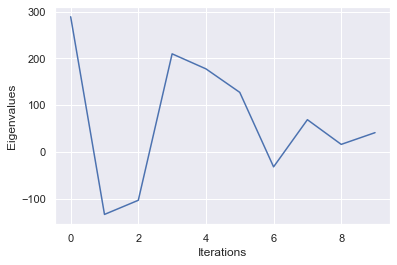

In [8]:
w_true = LA.eigvals(A)
print("True Eigenvalues:")
print(np.sort(w_true))
print("Lanczos Eigenvalues:")
print(np.sort(w))


plt.plot(w)
plt.xlabel('Iterations')
plt.ylabel('Eigenvalues')
plt.show()

### Non-Symmetric

In [9]:
N = 10 #Size of the matrix
b = np.random.random_integers(-100,100,size=(N,N))
del_A = np.random.rand(N,N)

print("A is:")
print((b + b.T)/2)
print("del_A is:")
print(del_A)

A is:
[[ 42.   17.5 -44.5  12.  -12.   10.   26.5  55.5   3.5 -38.5]
 [ 17.5  69.  -63.5  -9.5  17.   59.  -46.5 -22.   25.5  21.5]
 [-44.5 -63.5  89.   -5.5  49.  -29.   87.5 -10.  -21.5 -25.5]
 [ 12.   -9.5  -5.5 -98.   26.5   4.   55.5  62.5 -20.5  23.5]
 [-12.   17.   49.   26.5 -42.  -22.5 -20.   27.   23.5  -9.5]
 [ 10.   59.  -29.    4.  -22.5  29.   29.5  54.5   7.5   2. ]
 [ 26.5 -46.5  87.5  55.5 -20.   29.5 -47.   22.5  12.5 -26. ]
 [ 55.5 -22.  -10.   62.5  27.   54.5  22.5 -33.   89.5  65. ]
 [  3.5  25.5 -21.5 -20.5  23.5   7.5  12.5  89.5  38.   64.5]
 [-38.5  21.5 -25.5  23.5  -9.5   2.  -26.   65.   64.5  63. ]]
del_A is:
[[0.017 0.512 0.226 0.645 0.174 0.691 0.387 0.937 0.138 0.341]
 [0.113 0.925 0.877 0.258 0.66  0.817 0.555 0.53  0.242 0.093]
 [0.897 0.9   0.633 0.339 0.349 0.726 0.897 0.887 0.78  0.642]
 [0.084 0.162 0.899 0.606 0.009 0.101 0.664 0.005 0.161 0.549]
 [0.692 0.652 0.224 0.712 0.237 0.325 0.746 0.65  0.849 0.658]
 [0.568 0.094 0.368 0.265 0.244 0.973 

C:\Users\Adity\AppData\Local\Temp\ipykernel_43444\1192362168.py:2: DeprecationWarning: This function is deprecated. Please call randint(-100, 100 + 1) instead
  b = np.random.random_integers(-100,100,size=(N,N))



Associated eigenvalues for eta = 0: 
[-179.463  -94.023  -40.612   -0.144   30.401   52.714   88.095  137.617
  182.293  240.216]
True Eigenvalues:
[-192.075 -143.598  -82.119  -41.917  -18.617   24.033   56.726  110.238
  161.32   236.01 ]


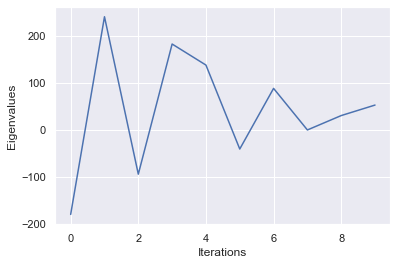


Associated eigenvalues for eta = 0.001: 
[-179.463  -94.023  -40.615   -0.148   30.383   52.693   88.094  137.618
  182.294  240.216]
True Eigenvalues:
[-192.075 -143.598  -82.119  -41.917  -18.617   24.033   56.727  110.238
  161.323  236.01 ]


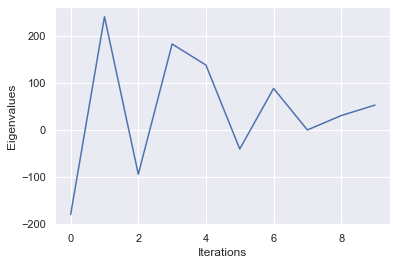


Associated eigenvalues for eta = 0.1: 
[-179.467  -94.116  -43.788   -0.286   36.414   82.479  136.022  143.491
  182.413  240.222]
True Eigenvalues:
[-192.042 -143.593  -82.131  -41.949  -18.559   24.054   56.865  110.254
  161.571  236.058]


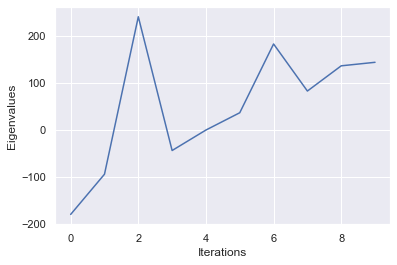


Associated eigenvalues for eta = 0.5: 
[-179.483  -94.528  -50.32    -1.522   33.978   80.307  137.424  182.6
  229.44   240.278]
True Eigenvalues:
[-191.909 -143.572  -82.177  -42.082  -18.327   24.138   57.415  110.314
  162.583  236.26 ]


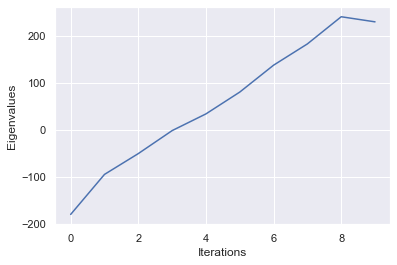


Associated eigenvalues for eta = 1: 
[-179.508  -95.349  -59.456   -2.623   28.184   73.886  136.983  182.913
  234.992  240.473]
True Eigenvalues:
[-191.744 -143.547  -82.236  -42.251  -18.039   24.24    58.092  110.381
  163.86   236.529]


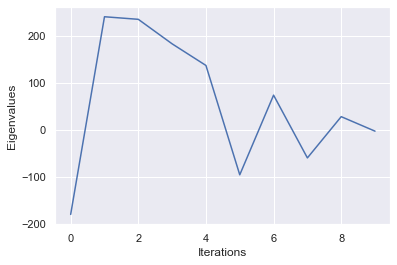

In [10]:



eta = 0.1
for eta in [0,0.001,0.1,0.5,1]:
    
    A= (b + b.T)/2 + eta*del_A
    n = A.shape[1]
    v_0 = np.zeros(n)
    v_0.fill(1.)
    v = v_0 / np.linalg.norm(v_0)

    # Obtaining the tri-diagonal matrix T
    T = lanczos(A, v)
    #print(f'Tridiagonalization of A: \n{T}')

    # Finding the eigenvalues w and eigenvectors v of the tri-diagonal matrix
    w, v = LA.eig(T)
    print(f'\nAssociated eigenvalues for eta = {eta}: \n{np.sort(w)}')
    w_true = LA.eigvals(A)
    print("True Eigenvalues:")
    print(np.sort(w_true))
    #print(f'\nAssociated eigenvectors: \n{v}')

    plt.plot(w)
    plt.xlabel('Iterations')
    plt.ylabel('Eigenvalues')
    plt.show()


